# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [35]:
data = pd.read_csv('demo01_ml.csv', low_memory=False)
data = data.drop(columns = ['Unnamed: 0'])
data.dtypes

ID                                                   int64
GENDER_M                                             int64
FLAG_OWN_CAR                                         int64
FLAG_OWN_REALTY                                      int64
CNT_CHILDREN                                         int64
AMT_INCOME_TOTAL                                   float64
DAYS_BIRTH                                           int64
DAYS_EMPLOYED                                        int64
FLAG_MOBIL                                           int64
FLAG_WORK_PHONE                                      int64
FLAG_PHONE                                           int64
FLAG_EMAIL                                           int64
CNT_FAM_MEMBERS                                    float64
default                                             object
NAME_INCOME_TYPE_Commercial_associate                int64
NAME_INCOME_TYPE_Pensioner                           int64
NAME_INCOME_TYPE_State_servant                       int

In [36]:
data.drop_duplicates()

,ID,GENDER_M,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine_staff,OCCUPATION_TYPE_Private_service_staff,OCCUPATION_TYPE_Realty_agents,OCCUPATION_TYPE_Sales_staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security_staff,OCCUPATION_TYPE_Waiters/barmen_staff
0,5008804,1,1,1,0,427500.0,-12005,-4542,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5008805,1,1,1,0,427500.0,-12005,-4542,1,1,...,0,0,0,0,0,0,0,0,0,0
2,5008806,1,1,1,0,112500.0,-21474,-1134,1,0,...,0,0,0,0,0,0,0,0,1,0
3,5008808,0,0,1,0,270000.0,-19110,-3051,1,0,...,0,0,0,0,0,0,1,0,0,0
4,5008809,0,0,1,0,270000.0,-19110,-3051,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441466,6840104,1,0,1,0,135000.0,-22717,365243,1,0,...,0,0,0,0,0,0,0,0,0,0
441467,6840222,0,0,0,0,103500.0,-15939,-3007,1,0,...,1,0,0,0,0,0,0,0,0,0
441468,6841878,0,0,0,0,54000.0,-8169,-372,1,1,...,0,0,0,0,0,0,1,0,0,0
441469,6842765,0,0,1,0,72000.0,-21673,365243,1,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
data.isnull().sum()

ID                                                      0
GENDER_M                                                0
FLAG_OWN_CAR                                            0
FLAG_OWN_REALTY                                         0
CNT_CHILDREN                                            0
AMT_INCOME_TOTAL                                        0
DAYS_BIRTH                                              0
DAYS_EMPLOYED                                           0
FLAG_MOBIL                                              0
FLAG_WORK_PHONE                                         0
FLAG_PHONE                                              0
FLAG_EMAIL                                              0
CNT_FAM_MEMBERS                                         0
default                                            424821
NAME_INCOME_TYPE_Commercial_associate                   0
NAME_INCOME_TYPE_Pensioner                              0
NAME_INCOME_TYPE_State_servant                          0
NAME_INCOME_TY

In [38]:
X = data.dropna()

y = X.default
y = y.astype(int)

X = X.drop(columns = ['default'])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [42]:
#1)

clf = DecisionTreeClassifier(random_state=100)

In [43]:
#2)

clf = clf.fit(X_train, y_train)

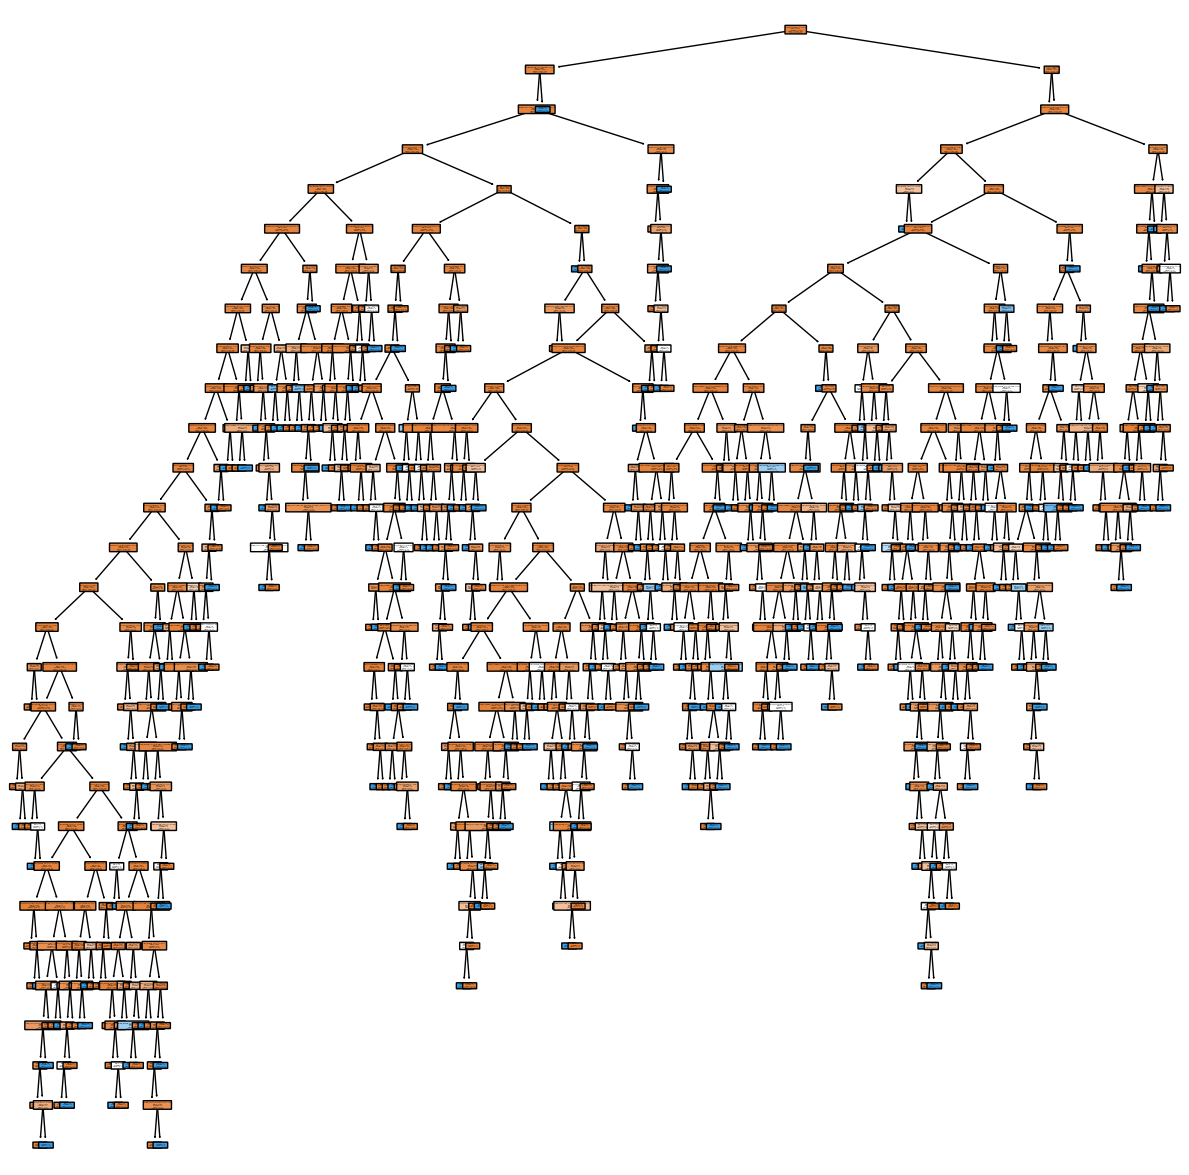

In [44]:
#3)

plt.figure(figsize=[15,15])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['aprovados', 'reprovados'],
         feature_names = list(X_train.columns));

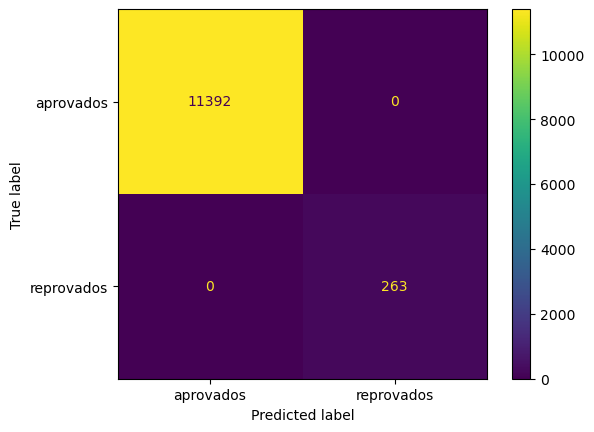

In [45]:
#4)

predict_train = clf.predict(X_train)

cm = confusion_matrix(y_train, predict_train, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['aprovados', 'reprovados'])

disp.plot()
plt.show()

In [55]:
acc_train = accuracy_score(y_train, predict_train)
acc_train

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [49]:
#1)

predict_test = clf.predict(X_test)

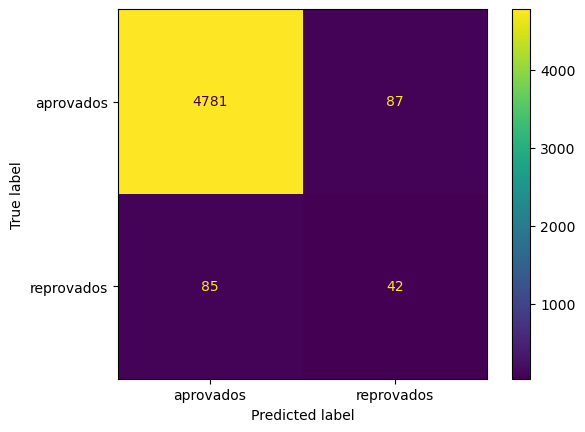

In [51]:
#2)

cm = confusion_matrix(y_test, predict_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['aprovados', 'reprovados'])

disp.plot()
plt.show()

In [58]:
#3)

acc_test = accuracy_score(y_test, predict_test)
acc_test

0.9655655655655656

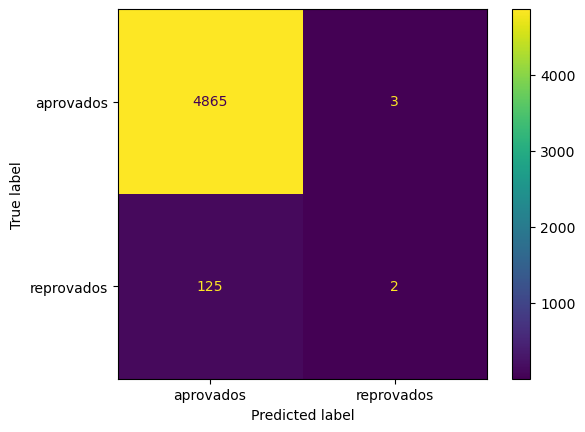

In [113]:
#4)

clf = DecisionTreeClassifier(random_state=123, max_depth=10, min_samples_leaf=5)
clf = clf.fit(X_train, y_train)

predict_test = clf.predict(X_test)

cm = confusion_matrix(y_test, predict_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['aprovados', 'reprovados'])

disp.plot()
plt.show()

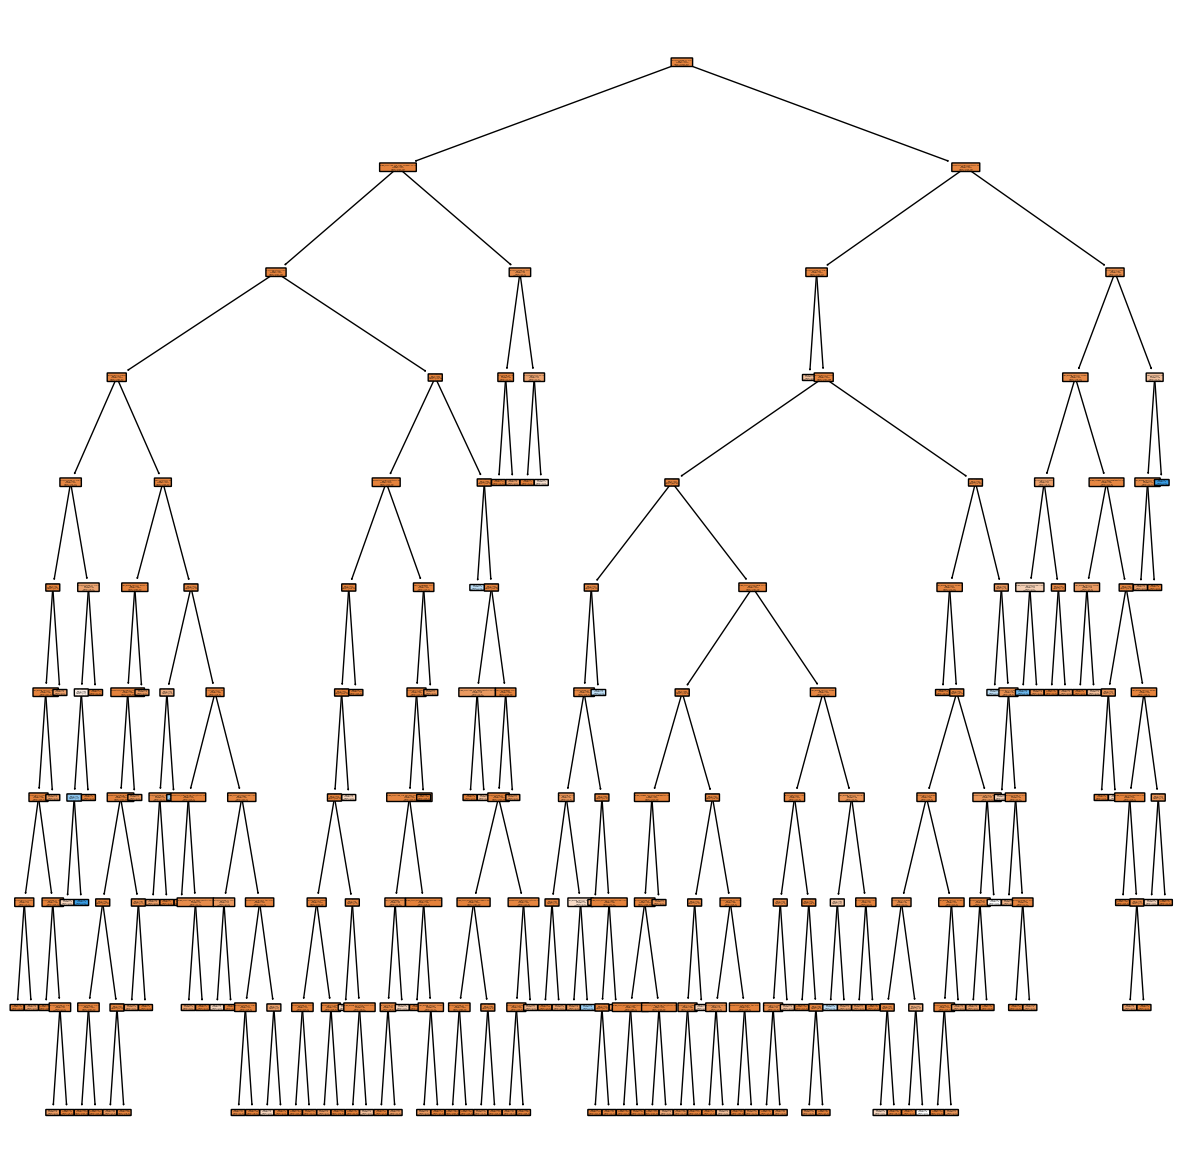

In [116]:
plt.figure(figsize=[15,15])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['aprovados', 'reprovados'],
         feature_names = list(X_train.columns));

In [110]:
acc_test = accuracy_score(y_test, predict_test)
acc_test

0.9743743743743744

In [65]:
#4) Proporção de propontentes classificados como maus

5/(4865+3+125+2)

0.001001001001001001

In [108]:
#5) Acurácia se todos classificados como bons

y_hip = [0]*y_test.shape[0]

acc_hip = accuracy_score(y_test, y_hip)
acc_hip

0.9745745745745745